In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from utils import *

/home/teguh/.local/lib/python2.7/site-packages/sklearn/utils/__init__.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .murmurhash import murmurhash3_32
/home/teguh/.local/lib/python2.7/site-packages/sklearn/utils/extmath.py:24: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._logistic_sigmoid import _log_logistic_sigmoid
/home/teguh/.local/lib/python2.7/site-packages/sklearn/utils/extmath.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .sparsefuncs_fast import csr_row_norms
/home/teguh/.local/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .expected_mutual_info_fast import expected_mutual_information
/home/teguh/.local/lib/python2.7/site-packages/sklearn/metrics/pairwise.py:3

In [ ]:
%load_ext autoreload
%autoreload 2

#### Declare Variables 

In [2]:
n_states = 4 #number of states in the GMM
n_in = 1 #Number of variables for the radial basis function [s] (decay term)
n_out = 4 # Number of motion variables [xi,x2]

n_data = 200 #length of trajectory
n_samples = 5 #number of demonstrations

#### Load Data 

(1000, 4)


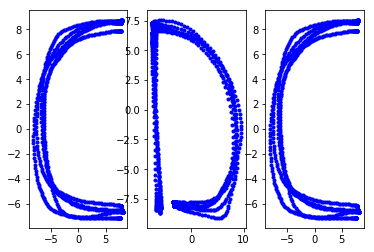

In [3]:
ROOT = 'python_data/2Dletters/'
data1 = np.load(ROOT + 'C.npy')[:n_samples]
data2 = np.load(ROOT + 'D.npy')[:n_samples]

#construct the output Y by concatenating all demonstrations in both dataset
data1 = data1.transpose([0,2,1])
data2 = data2.transpose([0,2,1])
data1 = np.concatenate(data1,axis=0)
data2 = np.concatenate(data2,axis=0)
Y = np.concatenate([data1,data2],axis=1)
print Y.shape

plt.subplot(1,3,1)
plt.plot(data1[:,0], data1[:,1],'.b')

plt.subplot(1,3,2)
plt.plot(data2[:,0], data2[:,1],'.b')

plt.subplot(1,3,3)
plt.plot(Y[:,0], Y[:,1],'.b')

#### Estimate GMM from the concatenated data [s_in, x_targets]

In [22]:
import time

In [107]:
gmm = semitiedGMM(K = n_states,D = n_out,bsf_param =  5E-2, n_step_variation = 50)
#gmm = GMM(K = n_states,D = n_out)

tic = time.time()
gmm.fit(Y,max_iter = 100, n_init = 1, init_type = 'kmeans')
toc = time.time()
clear_output()
print toc-tic

1.11890292168


In [111]:
gmm.Sigma_diag

array([[[0.0005, 0.    , 0.    , 0.    ],
        [0.    , 0.0003, 0.    , 0.    ],
        [0.    , 0.    , 0.0039, 0.    ],
        [0.    , 0.    , 0.    , 0.0001]],

       [[0.0075, 0.    , 0.    , 0.    ],
        [0.    , 0.0187, 0.    , 0.    ],
        [0.    , 0.    , 0.0817, 0.    ],
        [0.    , 0.    , 0.    , 0.0005]],

       [[0.0197, 0.    , 0.    , 0.    ],
        [0.    , 0.0005, 0.    , 0.    ],
        [0.    , 0.    , 0.0002, 0.    ],
        [0.    , 0.    , 0.    , 0.096 ]],

       [[0.0197, 0.    , 0.    , 0.    ],
        [0.    , 0.0071, 0.    , 0.    ],
        [0.    , 0.    , 0.0219, 0.    ],
        [0.    , 0.    , 0.    , 0.0628]]])

[-10, 10, -10, 10]

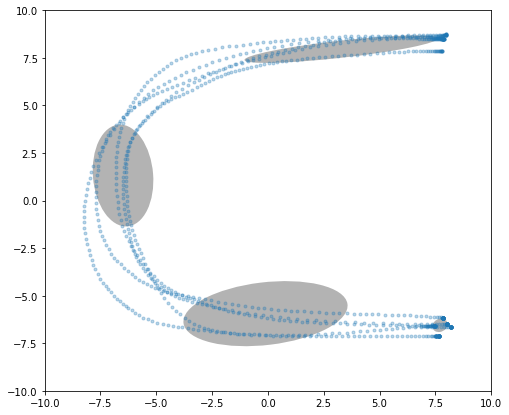

In [108]:
%matplotlib inline
fig = plt.figure(figsize=(8,7))
ax = fig.subplots()
plt.plot(Y[:,0], Y[:,1], '.', alpha=0.3)
plot_GMM(gmm.means_[:,:2], gmm.covariances_[:,:2,:2],ax)
plt.axis([-10,10,-10,10])

[-10, 10, -10, 10]

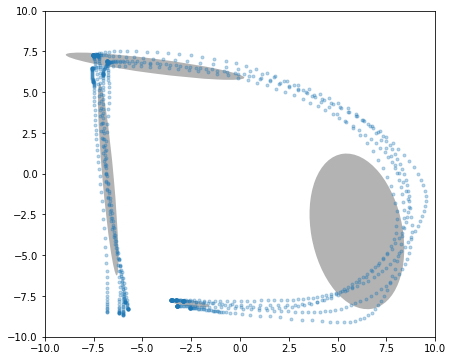

In [109]:
%matplotlib inline 
fig = plt.figure(figsize=(7,6))
ax = fig.subplots()
plt.plot(Y[:,2], Y[:,3], '.', alpha=0.3)
plot_GMM(gmm.means_[:,2:], gmm.covariances_[:,2:,2:],ax)
plt.axis([-10,10,-10,10])

#### Work with 3D Data 

In [4]:
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D

In [5]:
ROOT = 'data/'
filename = 'Zshape3D.mat'

data =  loadmat(ROOT + filename)['Data'].T

(-1.0000000000000004,
 43.00000000000001,
 -56.94721431981447,
 102.34626429376915)

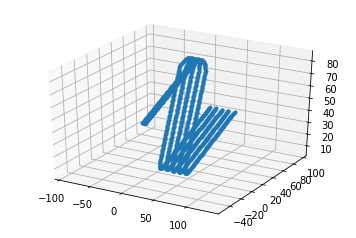

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data[:,0], data[:,1], data[:,2] ,'.')
plt.axis('equal')

In [18]:
gmm = MFA(D = 3, K = 3, n_fac = 1)

gmm.fit(data)

utils.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  self.Lambda_[k] = V[:,:self.n_fac]


Iteration 0
-10.110094891404188
Iteration 1
-12.105000116933532
Iteration 2
-11.945785137496593
Iteration 3
-11.769463370138949
Iteration 4
-11.576050945996991
Iteration 5
-11.371242816074176
Iteration 6
-11.161009351728378
Iteration 7
-10.950473904836185
Iteration 8
-10.744182044803882
Iteration 9
-10.547452891653256
Iteration 0
-10.081970400270892
Iteration 1
-12.106389289737669
Iteration 2
-11.947899161538015
Iteration 3
-11.772263768818778
Iteration 4
-11.579534484033934
Iteration 5
-11.375445167305417
Iteration 6
-11.165992002711855
Iteration 7
-10.956303687401475
Iteration 8
-10.75091137064264
Iteration 9
-10.555097370075517
Iteration 0
-10.081396245617563
Iteration 1
-12.106433084446474
Iteration 2
-11.947964510832811
Iteration 3
-11.772350214062318
Iteration 4
-11.579642114758016
Iteration 5
-11.37557518485134
Iteration 6
-11.16614639407553
Iteration 7
-10.956484596952691
Iteration 8
-10.75112049653534
Iteration 9
-10.555335285976774
Iteration 0
-10.081378350651041
Iteration 1


In [19]:
x1 = mvn(mean=gmm.means_[0], cov = gmm.covariances_[0]).rvs(100)
x2 = mvn(mean=gmm.means_[1], cov = gmm.covariances_[1]).rvs(100)
x3 = mvn(mean=gmm.means_[2], cov = gmm.covariances_[2]).rvs(100)


In [20]:
%matplotlib qt

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data[:,0], data[:,1], data[:,2] ,'.')
ax.plot3D(x1[:,0], x1[:,1], x1[:,2] ,'.r')
ax.plot3D(x2[:,0], x2[:,1], x2[:,2] ,'.g')
ax.plot3D(x3[:,0], x3[:,1], x3[:,2] ,'.y')

plt.axis('equal')

(-17.846513046552733,
 64.25079687405463,
 -74.14938695688052,
 119.26527165836494)

#### Use PCA 

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=1)

In [24]:
data_transformed = pca.fit_transform(data)

In [27]:
gmm2 = GMM(D = 1, K = 3)
gmm2.fit(data_transformed)

Iteration 0
-4.875218829274702
Iteration 1
-4.8242539492863825
Iteration 2
-4.823807888074036
Iteration 3
-4.823529432437871
Iteration 4
-4.82328214750405
Iteration 5
-4.823049022157087
Iteration 6
-4.822827707190887
Iteration 7
-4.822617825491917
Iteration 8
-4.822419254690118
Iteration 9
-4.822231878941524
Iteration 0
-4.834290501700977
Iteration 1
-4.8256365365027465
Iteration 2
-4.825081611621612
Iteration 3
-4.824754383895374
Iteration 4
-4.824461382981989
Iteration 5
-4.824181360510731
Iteration 6
-4.823911936475072
Iteration 7
-4.823653017764906
Iteration 8
-4.823404778575459
Iteration 9
-4.823167398773747
Iteration 0
-4.937759153005134
Iteration 1
-4.823600286117878
Iteration 2
-4.8231760973971785
Iteration 3
-4.822911277723702
Iteration 4
-4.82268328949945
Iteration 5
-4.822473979902074
Iteration 6
-4.822279269202638
Iteration 7
-4.822097559473214
Iteration 8
-4.821927906743865
Iteration 9
-4.821769630560403
Iteration 0
-4.922557703764822
Iteration 1
-4.823764507167668
Iterati

In [28]:
gmm2.means_

array([[ 41.66291491],
       [  0.16612188],
       [-41.48498557]])

In [29]:
gmm2.covariances_

array([[[237.89514397]],

       [[ 69.75745226]],

       [[242.56144626]]])

In [30]:
pca.mean_

array([23.03333333, 22.77519007, 44.6988273 ])

In [31]:
pca.components_

array([[-0.07536432,  0.81406798, -0.57585897]])

In [40]:
pca.inverse_transform(0.1)

array([[23.0257969 , 22.85659687, 44.6412414 ]])

In [41]:
dot(pca.components_.T,np.array([0.1])) + pca.mean_

array([23.0257969 , 22.85659687, 44.6412414 ])

In [42]:
mus = []
for mu in gmm2.means_:
    mus.append(pca.inverse_transform(mu))

In [46]:
pca_feature = pca.components_.T
print pca_feature.shape

(3, 1)


In [47]:
gmm2.covariances_

array([[[237.89514397]],

       [[ 69.75745226]],

       [[242.56144626]]])

In [52]:
covs = []
for cov in gmm2.covariances_:
    covs.append(dot(pca_feature, dot(cov, pca_feature.T)) + np.eye(3)*pca.noise_variance_)

In [53]:
x1 = mvn(mean=mus[0], cov = covs[0]).rvs(100)
x2 = mvn(mean=mus[1], cov = covs[1]).rvs(100)
x3 = mvn(mean=mus[2], cov = covs[2]).rvs(100)

In [54]:
%matplotlib qt

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(data[:,0], data[:,1], data[:,2] ,'.')
ax.plot3D(x1[:,0], x1[:,1], x1[:,2] ,'.r')
ax.plot3D(x2[:,0], x2[:,1], x2[:,2] ,'.g')
ax.plot3D(x3[:,0], x3[:,1], x3[:,2] ,'.y')

plt.axis('equal')

(-30.80271635836343, 86.28403988339949, -84.12971180597648, 129.87942663697783)